<a href="https://colab.research.google.com/github/IkramAlgo/IkramAlgo/blob/main/AdBudget_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


Dataset

In [3]:
data = {
    'Ad_Spending': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Revenue': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
print(df.head())


   Ad_Spending  Revenue
0            1        0
1            2        0
2            3        0
3            4        0
4            5        1


Data Splitting


In [4]:
X = df[['Ad_Spending']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training - Logistic Regression

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Model Evaluation

In [6]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


Gradient Descent (Custom Implementation)

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, learning_rate=0.01, epochs=100):
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]  # Adding intercept term
    theta = np.zeros(n + 1)  # Updated to (n + 1,) shape for bias term

    for epoch in range(epochs):
        z = np.dot(X, theta)  # (m, n+1) . (n+1,) = (m,)
        h = sigmoid(z)        # (m,)

        # Ensuring y has the right shape for subtraction
        y = y.reshape(-1)     # Make sure y is (m,)

        # Gradient calculation
        gradient = np.dot(X.T, (h - y)) / m  # (n+1, m) . (m,) = (n+1,)

        # Update theta
        theta -= learning_rate * gradient

    return theta

# Reshape X and y for compatibility
X_train_np = np.array(X_train).reshape(-1, 1)  # (m, 1)
y_train_np = np.array(y_train).reshape(-1, 1)  # (m, 1)

theta = gradient_descent(X_train_np, y_train_np)
print(f"Learned Coefficients (Gradient Descent): {theta}")


Learned Coefficients (Gradient Descent): [-0.1009131   0.24548993]


Neural Network with One Neuron


In [10]:
from keras.models import Sequential
from keras.layers import Dense

model_nn = Sequential()
model_nn.add(Dense(1, input_dim=1, activation='sigmoid'))
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=100, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Visualization

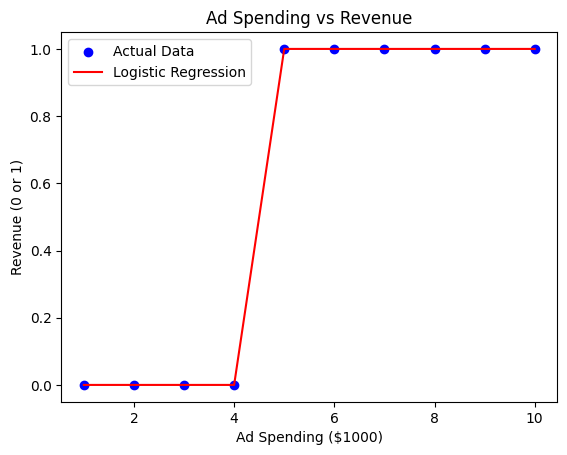

In [11]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Logistic Regression')
plt.xlabel("Ad Spending ($1000)")
plt.ylabel("Revenue (0 or 1)")
plt.title("Ad Spending vs Revenue")
plt.legend()
plt.show()
